In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import pickle
import itertools

sc.settings.verbosity = 3
sc.logging.print_header()

import warnings
warnings.filterwarnings("ignore")

/root/data1/GY/Mambaforge/envs/openbiomed/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.8 anndata==0.10.5.post1 umap==0.5.5 numpy==1.26.3 scipy==1.11.4 pandas==2.2.0 scikit-learn==1.4.0 statsmodels==0.14.1 igraph==0.11.8 pynndescent==0.5.11


# Set colormap

In [2]:
category_colors = {
    '0': '#cccccc',
    '1': '#a2c8ec',
    '2': '#9c9ede',
    '3': '#de9ed6',
    '4': '#fdab9f',
    '5': '#fdd0a2',
    '6': '#ffe100',
    '7': '#bcbd22',
    '8': '#cedb9c',
    '9': '#79c57b',
}

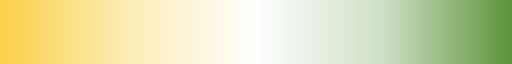

In [3]:
cmap_colors = ['#FBD149', '#FDEDB7', '#FFFFFF', '#CFE0C5', '#5D933B'] 
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', cmap_colors, N=256)
cmap

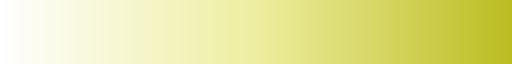

In [4]:
cmap_colors_2 = ['#FFFFFF', '#eeeea0', '#bcbd22'] 
cmap2 = mcolors.LinearSegmentedColormap.from_list('custom_cmap_2', cmap_colors_2, N=256)
cmap2

# Load adata

In [5]:
infer_adata = sc.read_h5ad('../fig4/l1000_mdmt_HDACi.h5ad')
infer_adata.obs["pert_dose_idx"] = infer_adata.obs["pert_dose_idx"].astype("category")
infer_adata.obs["pert_dose_idx_c"] = infer_adata.obs["pert_dose_idx"].astype("float")

infer_adata

AnnData object with n_obs × n_vars = 3439 × 978
    obs: 'sample_id', 'bead_batch', 'nearest_dose', 'pert_dose', 'pert_dose_unit', 'pert_idose', 'pert_time', 'pert_itime', 'pert_time_unit', 'cell_mfc_name', 'pert_mfc_id', 'det_plate', 'det_well', 'rna_plate', 'rna_well', 'count_mean', 'count_cv', 'qc_f_logp', 'qc_iqr', 'qc_slope', 'pert_id', 'pert_type', 'cell_iname', 'qc_pass', 'dyn_range', 'inv_level_10', 'build_name', 'failure_mode', 'project_code', 'cmap_name', 'pert_dose_idx', 'n_replicates', 'pert_idx', 'cell_idx', 'tissue_idx', 'tissue', 'cell_pert_dose_time', 'pretrain_split', 'split_breast_1', 'split_breast_2', 'split_breast_3', 'split_breast_4', 'split_breast_5', 'split_lung_1', 'split_lung_2', 'split_lung_3', 'split_lung_4', 'split_lung_5', 'split_haematopoietic_and_lymphoid_tissue_1', 'split_haematopoietic_and_lymphoid_tissue_2', 'split_haematopoietic_and_lymphoid_tissue_3', 'split_haematopoietic_and_lymphoid_tissue_4', 'split_haematopoietic_and_lymphoid_tissue_5', 'pert_do

# Load predict profiles

In [6]:
predict_result_path = "../fig4/hdaci_predict/"

predict_profile = np.load(predict_result_path+'y_pred.npy')
infer_adata.obsm["X_predict"] = predict_profile

infer_adata

AnnData object with n_obs × n_vars = 3439 × 978
    obs: 'sample_id', 'bead_batch', 'nearest_dose', 'pert_dose', 'pert_dose_unit', 'pert_idose', 'pert_time', 'pert_itime', 'pert_time_unit', 'cell_mfc_name', 'pert_mfc_id', 'det_plate', 'det_well', 'rna_plate', 'rna_well', 'count_mean', 'count_cv', 'qc_f_logp', 'qc_iqr', 'qc_slope', 'pert_id', 'pert_type', 'cell_iname', 'qc_pass', 'dyn_range', 'inv_level_10', 'build_name', 'failure_mode', 'project_code', 'cmap_name', 'pert_dose_idx', 'n_replicates', 'pert_idx', 'cell_idx', 'tissue_idx', 'tissue', 'cell_pert_dose_time', 'pretrain_split', 'split_breast_1', 'split_breast_2', 'split_breast_3', 'split_breast_4', 'split_breast_5', 'split_lung_1', 'split_lung_2', 'split_lung_3', 'split_lung_4', 'split_lung_5', 'split_haematopoietic_and_lymphoid_tissue_1', 'split_haematopoietic_and_lymphoid_tissue_2', 'split_haematopoietic_and_lymphoid_tissue_3', 'split_haematopoietic_and_lymphoid_tissue_4', 'split_haematopoietic_and_lymphoid_tissue_5', 'pert_do

# Filtering vorinostat samples

In [7]:
v_adata = infer_adata[(infer_adata.obs.cmap_name=='vorinostat') & (infer_adata.obs.pert_itime=='24 h')]
# v_adata = v_adata[v_adata.obs.cell_iname.isin(list(dict(v_adata.obs.cell_iname.value_counts()).keys())[:10])]

v_data_deg_true = v_adata.copy()
v_data_deg_true.X = v_adata.X-v_adata.obsm['X_ctl']

v_data_deg_predict = v_adata.copy()
v_data_deg_predict.X = v_adata.obsm["X_predict"]-v_adata.obsm['X_ctl']

v_data_deg_true

AnnData object with n_obs × n_vars = 488 × 978
    obs: 'sample_id', 'bead_batch', 'nearest_dose', 'pert_dose', 'pert_dose_unit', 'pert_idose', 'pert_time', 'pert_itime', 'pert_time_unit', 'cell_mfc_name', 'pert_mfc_id', 'det_plate', 'det_well', 'rna_plate', 'rna_well', 'count_mean', 'count_cv', 'qc_f_logp', 'qc_iqr', 'qc_slope', 'pert_id', 'pert_type', 'cell_iname', 'qc_pass', 'dyn_range', 'inv_level_10', 'build_name', 'failure_mode', 'project_code', 'cmap_name', 'pert_dose_idx', 'n_replicates', 'pert_idx', 'cell_idx', 'tissue_idx', 'tissue', 'cell_pert_dose_time', 'pretrain_split', 'split_breast_1', 'split_breast_2', 'split_breast_3', 'split_breast_4', 'split_breast_5', 'split_lung_1', 'split_lung_2', 'split_lung_3', 'split_lung_4', 'split_lung_5', 'split_haematopoietic_and_lymphoid_tissue_1', 'split_haematopoietic_and_lymphoid_tissue_2', 'split_haematopoietic_and_lymphoid_tissue_3', 'split_haematopoietic_and_lymphoid_tissue_4', 'split_haematopoietic_and_lymphoid_tissue_5', 'pert_dos

# PLot ground truth

In [8]:
adata = v_data_deg_true.copy()

ranking genes
    finished: added to `.uns['rank_genes_groups_by_dose']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


{'heatmap_ax': <Axes: >, 'groupby_ax': <Axes: ylabel='pert_dose_idx'>}

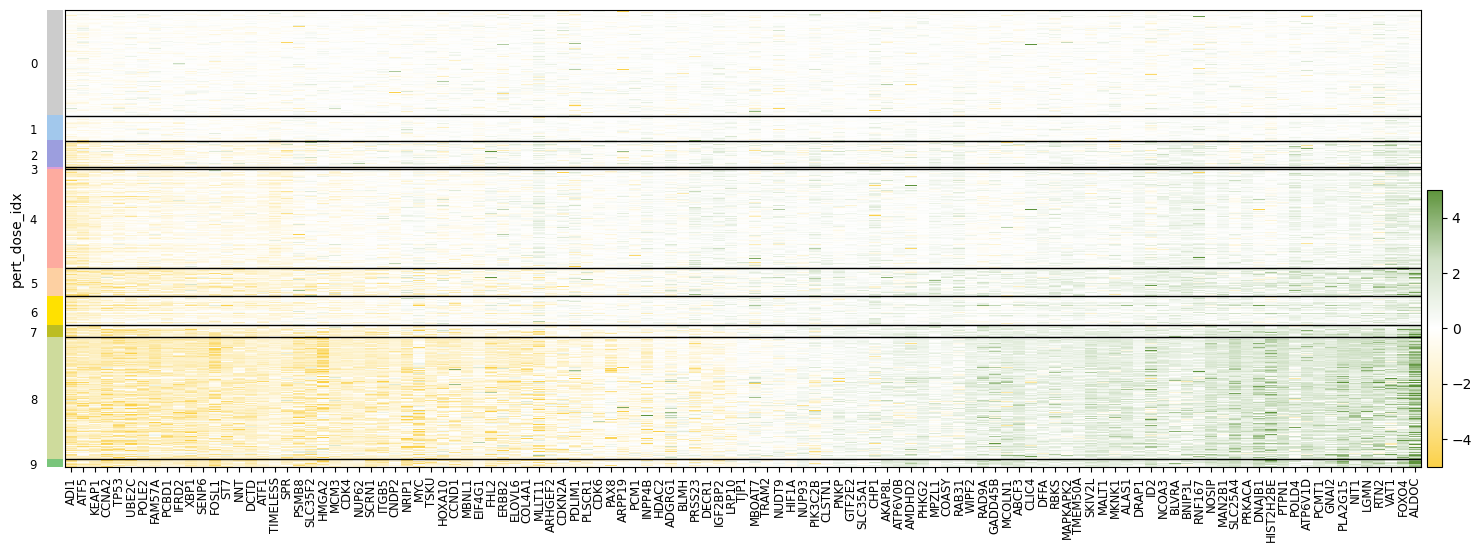

In [9]:
sc.tl.rank_genes_groups(adata, 
                        groupby='pert_dose_idx', 
                        method='t-test', 
                        key_added='rank_genes_groups_by_dose', 
                        add_dendrogram=False,
                        n_genes=15)

genes_arr = adata.uns['rank_genes_groups_by_dose']['names']
genes = [item for sublist in genes_arr for item in list(sublist)]
genes = np.unique(genes)
genes_mean_change = adata[:, genes].X.mean(axis=0) 
sorted_genes = [gene for gene, _ in sorted(zip(genes, genes_mean_change), key=lambda x: x[1])]
adata.uns['pert_dose_idx_colors'] = list(category_colors.values())

sc.pl.heatmap(adata, 
              var_names=sorted_genes,
              groupby='pert_dose_idx',  
              show_gene_labels=True,
              cmap=cmap,
              figsize=(18,6),
              vmin=-5, vmax=5,
             show=False)

# plt.savefig('figs/mdmt_heatmap_vorinostat_ten_celline_truth.svg', format='svg', dpi=300)

computing PCA
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


<Axes: title={'center': 'pert_dose_idx_c'}, xlabel='UMAP1', ylabel='UMAP2'>

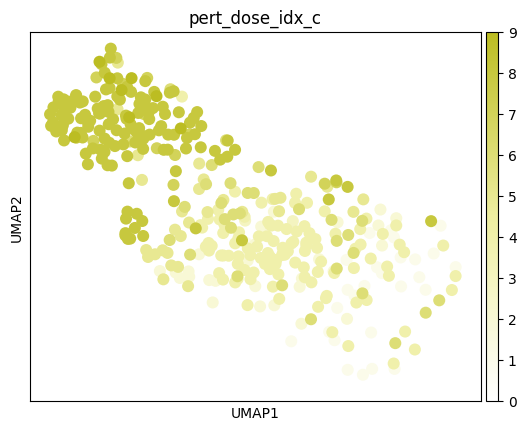

In [10]:
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=40)
sc.tl.umap(adata)

adata.uns['cell_iname_colors'] = list(category_colors.values())
adata.uns['pert_dose_idx_colors']  = list(category_colors.values())


sc.pl.umap(adata, color=['pert_dose_idx_c'], size=300,
           color_map=cmap2, 
           frameon=True, legend_fontsize=10, wspace=0.3, legend_fontoutline=2,
          show=False)

# plt.savefig('figs/mdmt_umap_vorinostat_ten_celline_truth.svg', format='svg', dpi=300)

# PLot predicted result

In [11]:
adata = v_data_deg_predict.copy()

ranking genes
    finished: added to `.uns['rank_genes_groups_by_dose']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


{'heatmap_ax': <Axes: >, 'groupby_ax': <Axes: ylabel='pert_dose_idx'>}

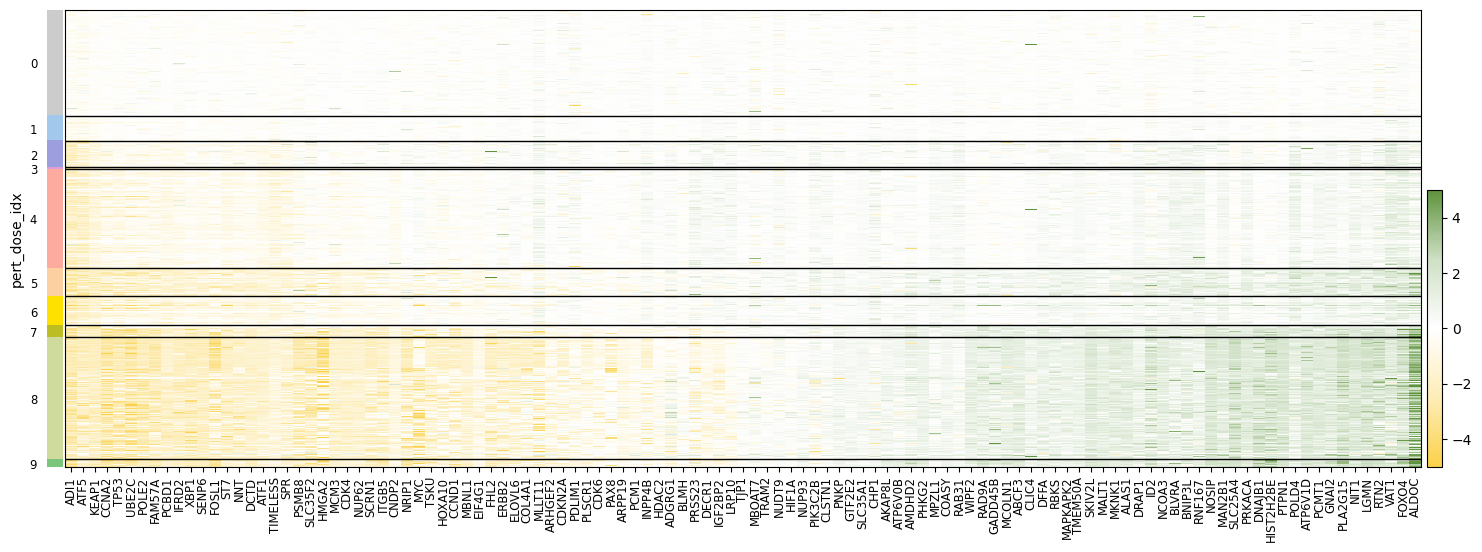

In [12]:
sc.tl.rank_genes_groups(adata, 
                        groupby='pert_dose_idx', 
                        method='t-test', 
                        key_added='rank_genes_groups_by_dose', 
                        add_dendrogram=False,
                        n_genes=15)

adata.uns['pert_dose_idx_colors'] = list(category_colors.values())

sc.pl.heatmap(adata, 
              var_names=sorted_genes,
              groupby='pert_dose_idx',  
              show_gene_labels=True,
              cmap=cmap,
              figsize=(18,6),
              vmin=-5, vmax=5,
             show=False)

# plt.savefig('figs/mdmt_heatmap_vorinostat_ten_celline_predict.svg', format='svg', dpi=300)

computing PCA
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


<Axes: title={'center': 'pert_dose_idx_c'}, xlabel='UMAP1', ylabel='UMAP2'>

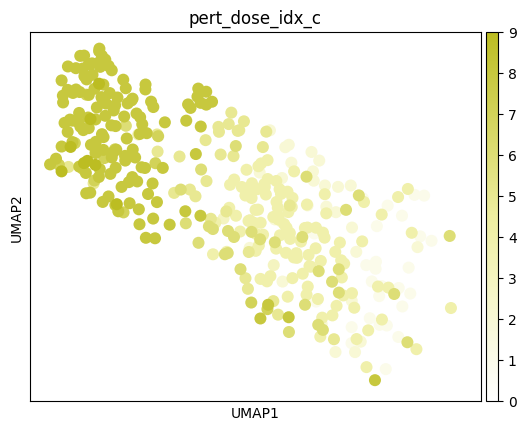

In [13]:
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=60)
sc.tl.umap(adata)

adata.uns['cell_iname_colors'] = list(category_colors.values())
adata.uns['pert_dose_idx_colors']  = list(category_colors.values())


sc.pl.umap(adata, color=['pert_dose_idx_c'], size=300,
           color_map=cmap2,
           frameon=True, legend_fontsize=10, wspace=0.3, legend_fontoutline=2,
          show=False)


# plt.savefig('figs/mdmt_umap_vorinostat_ten_celline_predict.svg', format='svg', dpi=300)

# Line graphs of gene-dose

In [14]:
def get_gene_dose_df(adata, gene_list):
    df = adata.obs
    for gene_name in gene_list:
        df.loc[:, gene_name] = adata[:, gene_name].X.flatten()
    return df

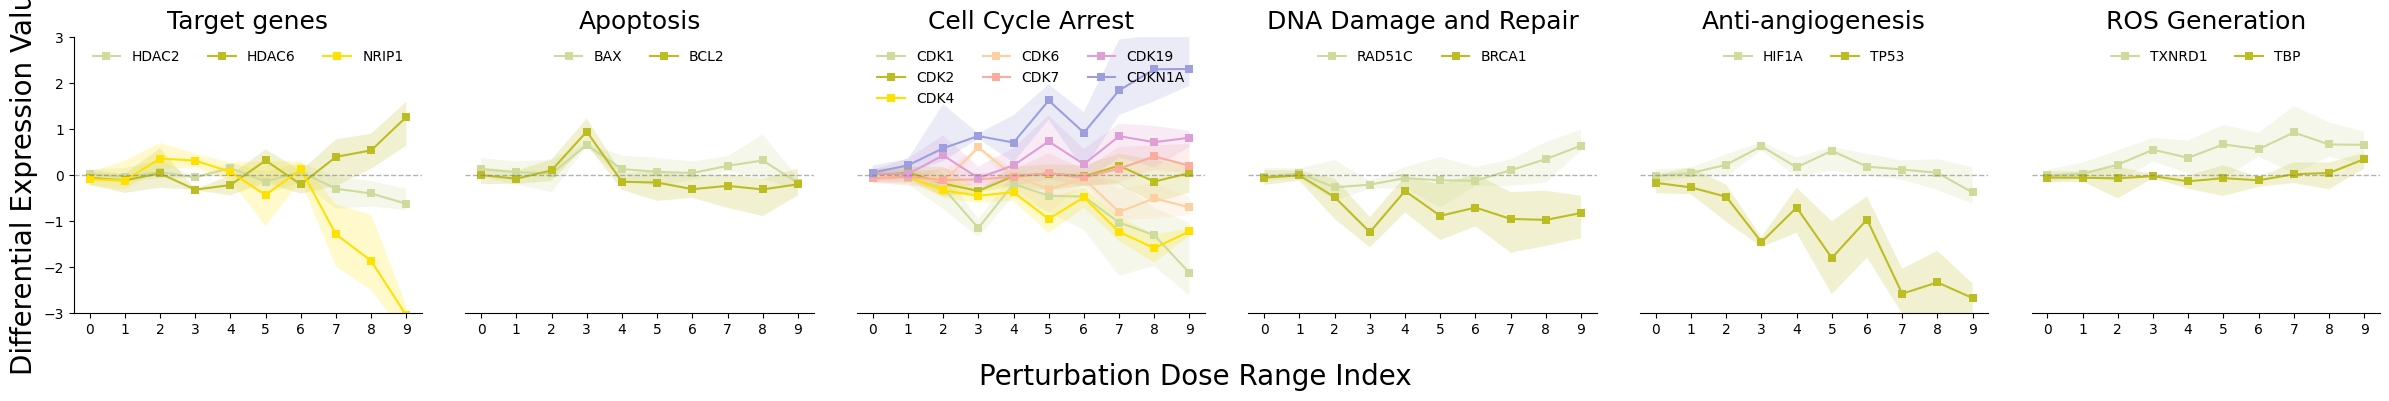

In [17]:
color_list = [
    '#cedb9c', '#bcbd22', '#ffe100', '#fdd0a2',
    '#fdab9f', '#de9ed6', '#9c9ede', '#a2c8ec'
]

gene_dict = {
    "Target genes": ["HDAC2", "HDAC6", "NRIP1"],
    "Apoptosis": ["BAX", "BCL2"],
    "Cell Cycle Arrest": ["CDK1", "CDK2", "CDK4", "CDK6", "CDK7", "CDK19", "CDKN1A"],
    "DNA Damage and Repair": ["RAD51C", "BRCA1"],
    "Anti-angiogenesis": ["HIF1A", "TP53"],
    "ROS Generation": ["TXNRD1", "TBP"]
}

fig, axes = plt.subplots(1, 6, figsize=(24, 4), sharex=True, sharey=True)

for idx, (gene_type, gene_list) in enumerate(gene_dict.items()):
    
    df = get_gene_dose_df(v_data_deg_true, gene_list)
    
    ax = axes[idx] 
    
    for i, gene_name in enumerate(gene_list):
        df_median = df.groupby('pert_dose_idx')[gene_name].median()
        df_q1 = df.groupby('pert_dose_idx')[gene_name].quantile(0.25)
        df_q3 = df.groupby('pert_dose_idx')[gene_name].quantile(0.75)

        sns.lineplot(x=df_median.index, y=df_median, marker='s', color=color_list[i], 
                     label=gene_name, markeredgewidth=0, ax=ax)
        ax.fill_between(df_median.index, df_q1, df_q3, color=color_list[i], alpha=0.2, edgecolor="none")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.6)
    
    ax.set_ylim(-3, 3)
    ax.set_xlabel('', fontsize=10)
    if idx == 0:
        ax.set_ylabel('Differential Expression Value', fontsize=20)  
    else:
        ax.set_ylabel('')
        ax.tick_params(left=False)
        ax.spines['left'].set_visible(False) 
        
    ax.set_title(gene_type, fontsize=18)
    
    ax.legend(loc='upper center', ncol=3, frameon=False, fontsize=10, bbox_to_anchor=(0.5, 1))

fig.supxlabel("Perturbation Dose Range Index", fontsize=20)
plt.tight_layout()
plt.show()

# fig.savefig('figs/mdmt_gene_distribution_vorinostat_all_celline_true.svg', format='svg', dpi=300)

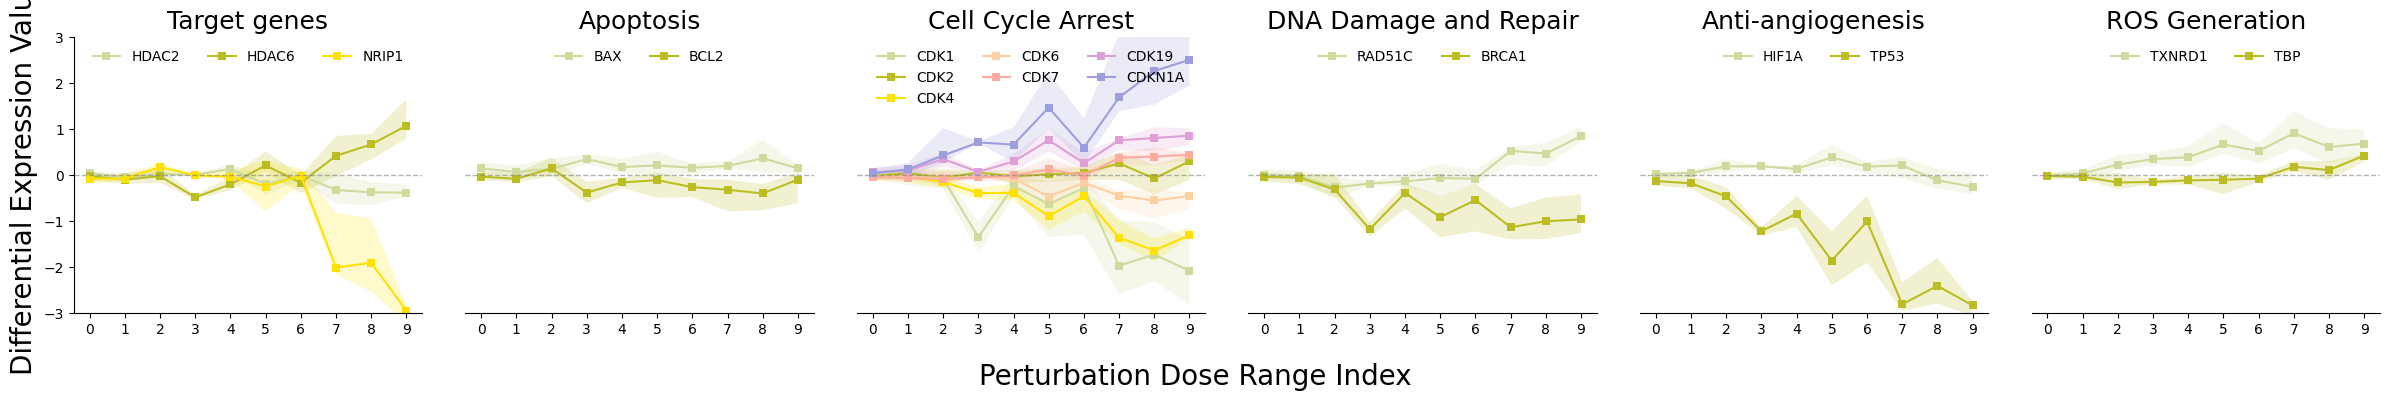

  pert_dose_idx    median        q1        q3   gene     gene_type
0             0  0.047547 -0.023071  0.099792  HDAC2  Target genes
1             1 -0.044159 -0.117218  0.045273  HDAC2  Target genes
2             2  0.030319 -0.037948  0.164185  HDAC2  Target genes
3             3  0.012287  0.009146  0.015429  HDAC2  Target genes
4             4  0.139954  0.063461  0.246430  HDAC2  Target genes


In [23]:
summary_list = []

fig, axes = plt.subplots(1, 6, figsize=(24, 4), sharex=True, sharey=True)

for idx, (gene_type, gene_list) in enumerate(gene_dict.items()):
    
    df = get_gene_dose_df(v_data_deg_predict, gene_list)
    ax = axes[idx]

    for i, gene_name in enumerate(gene_list):
        grouped = df.groupby('pert_dose_idx')[gene_name].agg(
            median='median',
            q1=lambda x: x.quantile(0.25),
            q3=lambda x: x.quantile(0.75)
        ).reset_index()

        grouped["gene"] = gene_name
        grouped["gene_type"] = gene_type

        summary_list.append(grouped)

        sns.lineplot(x="pert_dose_idx", y="median", data=grouped, marker='s', 
                     color=color_list[i], label=gene_name, markeredgewidth=0, ax=ax)
        ax.fill_between(grouped["pert_dose_idx"], grouped["q1"], grouped["q3"],
                        color=color_list[i], alpha=0.2, edgecolor="none")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.6)
    ax.set_ylim(-3, 3)
    ax.set_xlabel('', fontsize=10)
    ax.set_title(gene_type, fontsize=18)

    if idx == 0:
        ax.set_ylabel('Differential Expression Value', fontsize=20)
    else:
        ax.set_ylabel('')
        ax.tick_params(left=False)
        ax.spines['left'].set_visible(False)

    ax.legend(loc='upper center', ncol=3, frameon=False, fontsize=10, bbox_to_anchor=(0.5, 1))

fig.supxlabel("Perturbation Dose Range Index", fontsize=20)
plt.tight_layout()
plt.show()

summary_df = pd.concat(summary_list, ignore_index=True)
print(summary_df.head())

In [27]:
# summary_df.to_csv("../fig4/line_plot.csv")